In [1]:
from __future__ import print_function
import os
import sys
import cv2
from matplotlib import pyplot as plt
import numpy as np

from local_config import CURRENT_DIR
sys.path.append(os.path.join(CURRENT_DIR, ".."))

try:
    from config import Config
    from data_loader import WaymoStixelDataset
except:
    print("failed to load module")
    
from albumentations import (
    Resize,
    Compose,
    CLAHE,
    HueSaturationValue,
    RandomBrightness,
    RandomContrast,
    RandomGamma,
    ToFloat,
    Normalize,
    GaussNoise,
    RandomShadow,
    RandomRain,
)

import utility
import importlib

In [2]:
dt_config = Config()
dt_config.display()


Configurations:
CURRENT_DIR                    /pfs/data5/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet
DATA_PATH                      /pfs/data5/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo
GROUND_TRUTH_PATH              /pfs/data5/home/es/es_es/es_menzweil/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo/waymo_train.txt
NUM_EPOCHS                     50
SAVED_MODELS_PATH              saved_models




In [9]:
## Train set

import importlib
import sys
importlib.reload(sys.modules['data_loader'])
from data_loader import WaymoStixelDataset

train_aug = Compose(
    [
        GaussNoise(p=1.0),
        RandomShadow(p=0.5),
        RandomRain(p=0.5, rain_type="drizzle"),
        RandomContrast(limit=0.2, p=0.5),
        RandomGamma(gamma_limit=(80, 120), p=0.5),
        RandomBrightness(limit=0.2, p=0.5),
        HueSaturationValue(
            hue_shift_limit=5, sat_shift_limit=20, val_shift_limit=10, p=0.5
        ),
        CLAHE(p=0.5, clip_limit=2.0),
        Normalize(p=1.0),
    ]
)
    

train_set = WaymoStixelDataset(
        data_path=dt_config.DATA_PATH,
        ground_truth_path=dt_config.GROUND_TRUTH_PATH,
        batch_size=1,
        transform=None,
        customized_transform=utility.HorizontalFlip(p=0.5),
    )


X,y = train_set[0]

print(np.shape(y))


/home/es/es_es/es_menzweil/anaconda3/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1826: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/es/es_es/es_menzweil/anaconda3/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1800: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


(240,)


(1, 1280, 1920, 3)
(240,)
[ 550.  896.  896.  880.  832.  550.  550.  550.  550.  550.  550.  550.
  550.  550.  550.  550.  616.  632.  640.  648.  656.  550.  550.  550.
  880.  816.  864.  848.  848.  860.  896.  904.  816.  912.  550.  912.
  912.  550.  904.  904.  912.  904.  912.  904.  912.  912.  912.  928.
  920.  550.  856.  896.  550.  896.  896.  872.  896.  888.  904.  884.
  888.  904.  920.  912.  872.  896.  888.  550.  912.  880.  896.  904.
  872.  904.  864.  888.  856.  896.  880.  904.  880.  896.  550.  896.
  896.  880.  896.  904.  904.  912.  912.  904.  936.  936.  912.  936.
  936.  550.  920.  920.  896.  912.  904.  936.  932.  936.  944.  952.
  944.  952.  952.  952.  550.  952.  968.  960.  968.  968.  960.  912.
  912.  904.  960.  550.  904.  928.  976. 1012. 1048. 1048. 1040.  550.
 1072. 1072. 1068. 1072. 1072. 1048.  550. 1032. 1056. 1032. 1036. 1072.
 1048. 1072.  550. 1112. 1048. 1056. 1048. 1048. 1048.  550. 1048. 1112.
 1064. 1064. 1056.  550. 

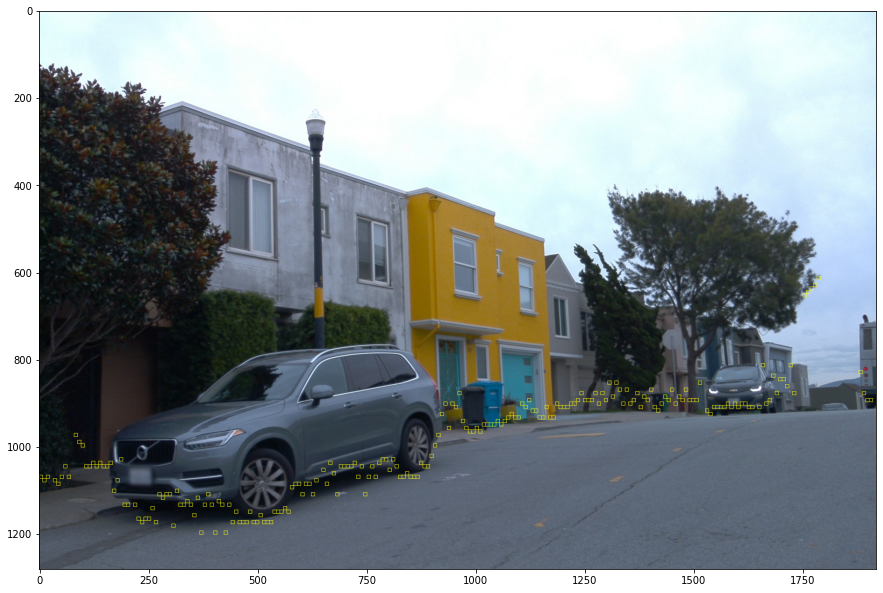

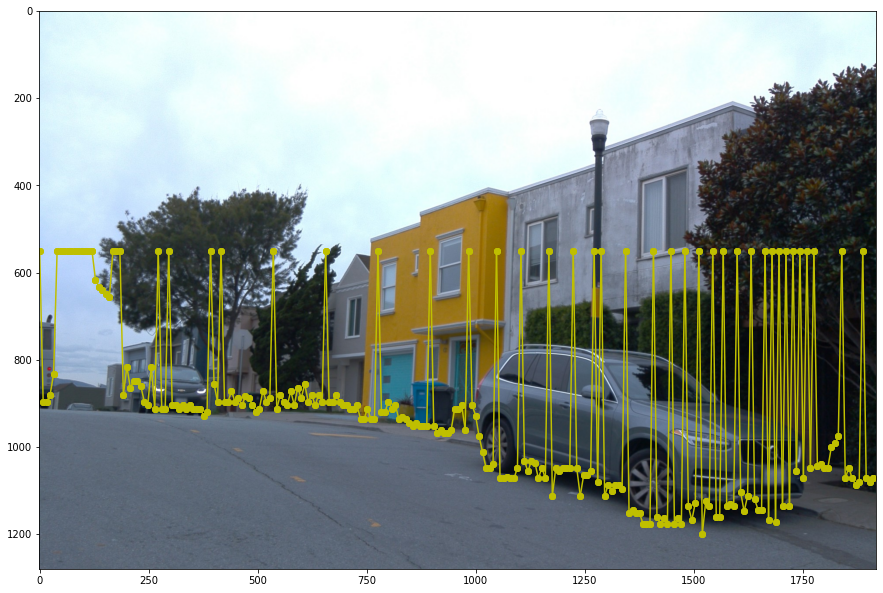

In [10]:
idx = 3

imgs, labels = train_set[idx]
print(np.shape(imgs))
print(np.shape(labels))

visualized_stixel = train_set.visualize_one_image(idx)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(visualized_stixel, cv2.COLOR_BGR2RGB))
#cv2.imwrite("test.jpg", visualized_stixel)


plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))
#labels = positions[0,:,1]

origImageWidth = imgs[0].shape[1]
labelWidth = labels.size

x = list(range(0, origImageWidth, int(origImageWidth/labelWidth)))
print(labels)
plt.plot(x, labels, 'yo')
for i in range(0, len(x), 1):
    plt.plot(x[i:i+2], labels[i:i+2], 'y-o')

